# 전국 신규 민간 아파트 분양 가격 동향

In [1]:
# base
import os
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 정규표현식
import re

# plotnine
from plotnine import *
import plotnine

In [3]:
# 그래프에서 한글표현을 위한 폰트 설치
%config InlineBackend.figure_format = 'retina'

import matplotlib.font_manager as fm

!apt -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

Unable to locate an executable at "/Library/Java/JavaVirtualMachines/jdk-10.0.1.jdk/Contents/Home/bin/apt" (-1)


In [4]:
# 기본 글꼴 변경
import matplotlib as mpl

mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# Data Load

In [5]:
print(os.listdir("data/"))

['raw.csv', '2018_06_national_avg_selling_pirce.csv']


In [6]:
pre_sale = pd.read_csv("data/2018_06_national_avg_selling_pirce.csv", encoding='euc-kr')
print(pre_sale.shape)

(2805, 5)


# Null Check

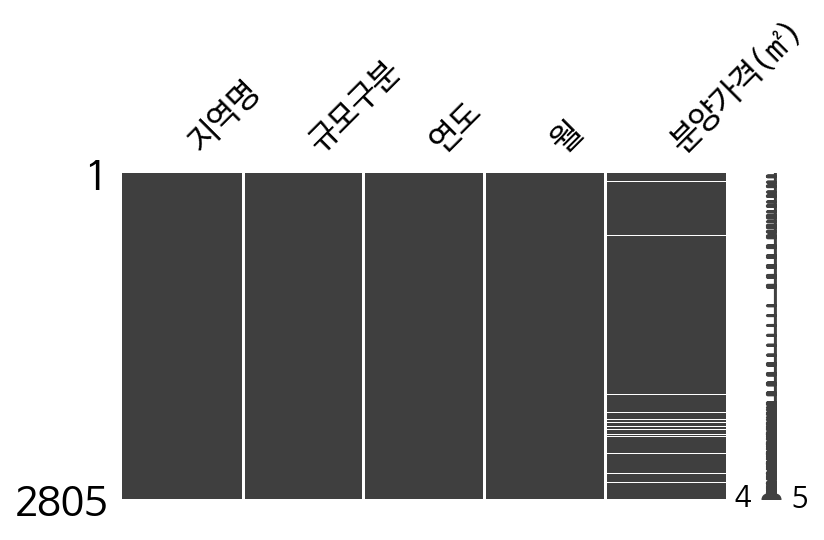

In [7]:
msno.matrix(pre_sale, figsize=(6, 3))

In [8]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    147
dtype: int64

In [9]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841.0
1,서울,전용면적 60㎡이하,2015,10,5652.0
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0
4,서울,전용면적 102㎡초과,2015,10,5879.0


# Data Processing

In [10]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      2805 non-null   object 
 1   규모구분     2805 non-null   object 
 2   연도       2805 non-null   int64  
 3   월        2805 non-null   int64  
 4   분양가격(㎡)  2658 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 109.7+ KB


In [11]:
pre_sale["연도"] = pre_sale["연도"].astype(str)
pre_sale["월"] = pre_sale["월"].astype(str)

In [13]:
pre_sale["평당분양가격"] = pre_sale["분양가격(㎡)"] * 3.3

pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7


In [14]:
pre_sale.describe()

,분양가격(㎡),평당분양가격
count,2658.000000,2658.000000
mean,3060.279533,10098.922460
std,1111.300681,3667.292246
min,1868.000000,6164.400000
25%,2345.250000,7739.325000
50%,2743.000000,9051.900000
75%,3300.750000,10892.475000
max,8098.000000,26723.400000


In [15]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월
count,2805,2805,2805,2805
unique,17,5,4,12
top,대구,전용면적 102㎡초과,2016,11
freq,165,561,1020,255


In [16]:
pre_sale_2017 = pre_sale.loc[pre_sale["연도"] == "2017"]
print(pre_sale_2017.shape)

(1020, 6)


In [17]:
pre_sale["규모구분"].value_counts()

전용면적 102㎡초과          561
전용면적 60㎡초과 85㎡이하     561
전용면적 60㎡이하           561
전체                   561
전용면적 85㎡초과 102㎡이하    561
Name: 규모구분, dtype: int64

# 전국 평균 분양가격

In [18]:
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T

연도              2015   2016   2017   2018
분양가격(㎡) count    243    984    975    456
        mean   2,789  2,934  3,143  3,299
        std      977  1,071  1,111  1,199
        min    1,868  1,900  1,976  2,076
        25%    2,225  2,282  2,373  2,470
        50%    2,516  2,672  2,838  2,912
        75%    3,026  3,148  3,466  3,647
        max    7,092  8,096  7,887  8,098
평당분양가격  count    243    984    975    456
        mean   9,203  9,683 10,373 10,888
        std    3,224  3,536  3,665  3,958
        min    6,164  6,270  6,521  6,851
        25%    7,342  7,531  7,831  8,153
        50%    8,303  8,818  9,365  9,611
        75%    9,984 10,390 11,438 12,036
        max   23,404 26,717 26,027 26,723

# 규모별 전국평균 분양 가격

In [19]:
pre_sale.pivot_table("평당분양가격", "규모구분", "연도")

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,311","11,260"
전용면적 60㎡이하,"8,952","9,399","10,271","10,957"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,840","10,438"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,573","11,457"
전체,"8,893","9,293","9,927","10,560"


# 전국 분양가 변동금액

In [20]:
region_year_all = pre_sale.loc[pre_sale["규모구분"] == "전체"]
region_year = region_year_all.pivot_table("평당분양가격", "규모구분", "연도").reset_index()
region_year

연도,규모구분,2015,2016,2017,2018
0,전체,"8,893","9,293","9,927","10,560"


In [21]:
region_year["변동액"] = (region_year['2018'] - region_year['2015']).astype(int)

max_price = np.max(region_year['변동액']) * 1000
min_price = np.min(region_year['변동액']) * 1000
mean_price = np.mean(region_year['변동액']) * 1000

print("2015 ~ 2018 분양가는 상승하였다, 상승액이 가장 큰 곳은 제주, 평당 {:,.0f}원이다.".format(max_price))
print("2015 ~ 2018 상승액이 가장 작은 곳은 울산, 평당 {:,.0f}원이다.".format(min_price))
print("2015 ~ 2018 전국 평균 변동액은 평당 {:,.0f}원이다.".format(mean_price))

region_year

2015 ~ 2018 분양가는 상승, 상승액이 가장 큰 곳은 제주, 평당 1,667,000원이다.
2015 ~ 2018 상승액이 가장 작은 곳은 울산, 평당 1,667,000원이다.
2015 ~ 2018 전국 평균 변동액은 평당 1,667,000원이다.


연도,규모구분,2015,2016,2017,2018,변동액
0,전체,"8,893","9,293","9,927","10,560",1667


In [ ]:
#옆으로 붙일 때는 merge 아래로 붙일 때는 concat